In [1]:
import import_ipynb

In [2]:
%run iteration_0_imports.py

In [3]:
%run iteration_0_parameters.py

In [4]:
import iteration_0_utils as utils

importing Jupyter notebook from iteration_0_utils.ipynb


In [5]:
%whos

Variable                          Type        Data/Info
-------------------------------------------------------
HEALTHY                           str         H
IMG_IN_COLOR                      int         1
IMG_SIZE                          int         64
Image                             module      <module 'PIL.Image' from <...>packages\\PIL\\Image.py'>
NBR_SAMPLE                        int         20000
PATH_DATA                         str         ../data
PATH_DATA_EDA                     str         ../data/eda
PATH_DATA_LIST                    str         ../data/list
PATH_DATA_SAMPLE                  str         ../data/sample
PATH_MODEL                        str         ../model
PATH_ROOT                         str         ..
PATH_SOURCE_IMG                   str         ../cell_images
RandomForestClassifier            ABCMeta     <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
SICK                              str         S
classification_report             function

In [6]:
# read files
list_files = glob.glob(f"{PATH_DATA}/results/"+'*.pklz')

In [9]:
results = []
for file in list_files:
    random_state = file.split("_")[1].split(".")[0]
    N, train_score, validation_score = utils.pickle_read(f"{PATH_DATA}/results/results_{random_state}.pklz")
    results.append([N, train_score, validation_score, int(random_state)])

In [11]:
N , train_score_mean, validation_score_mean, _ = np.mean(results, axis = 0)

C:\Users\kbenmus\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [15]:
results_std = [i[:-1] for i in results]
N_std, train_std, valid_std = np.std(results_std, axis = 0)

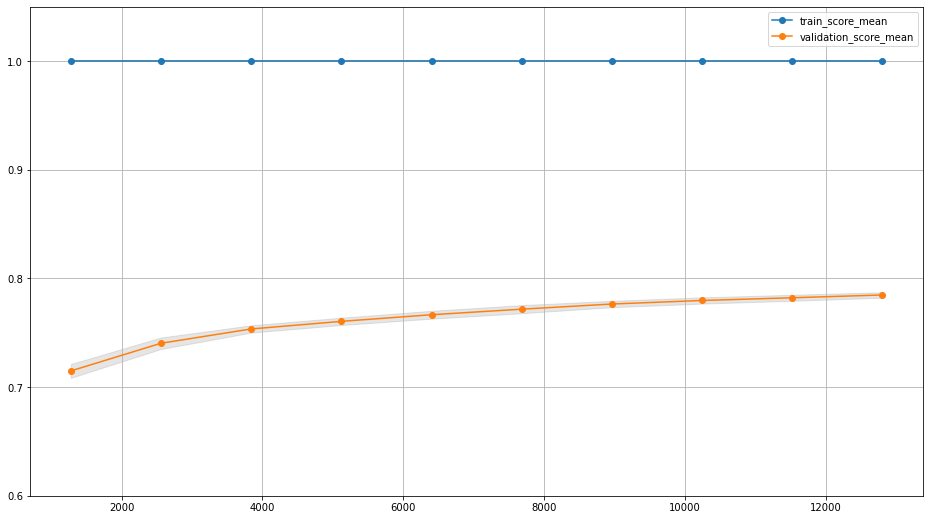

In [23]:
plt.figure(figsize=(16,9))
plt.grid()
axes = plt.gca()
axes.set_ylim([0.6,1.05])

plt.plot(N, train_score_mean, "o-", label = "train_score_mean")
plt.plot(N, validation_score_mean  , "o-", label = "validation_score_mean")
plt.fill_between(N, train_score_mean + train_std, train_score_mean - train_std, color = "grey")
plt.fill_between(N, validation_score_mean + valid_std, validation_score_mean - valid_std, color = "grey", alpha = 0.2)

plt.legend()

plt.show()